<a href="https://colab.research.google.com/github/ashishbhatta/Assignment-2/blob/main/Question_2/%20Fault_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time

from sklearn.model_selection import train_test_split #needed for spliting data into testing and training
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RepeatedKFold

In [3]:
df_LG = pd.read_csv("https://github.com/ashishbhatta/Assignment-2/raw/refs/heads/main/Question_2/LG.csv")
df_LL = pd.read_csv("https://github.com/ashishbhatta/Assignment-2/raw/refs/heads/main/Question_2/LL.csv")
df_LLG=pd.read_csv("https://github.com/ashishbhatta/Assignment-2/raw/refs/heads/main/Question_2/LLG.csv")
df_LLL = pd.read_csv("https://github.com/ashishbhatta/Assignment-2/raw/refs/heads/main/Question_2/LLL_fault.csv")

df = pd.concat([df_LG, df_LL, df_LLG, df_LLL],ignore_index=True,axis=0) # ignore_index=True,
print(df)

data=np.array(df)
X=data[:,1:4]
y=data[:,4]

      test_data       I_a       I_b       I_c  Fault_Type
0             1  2.789859  0.000000  0.000000         2.0
1             2  2.794565  0.000000  0.000000         2.0
2             3  2.795167  0.000000  0.000000         2.0
3             4  2.795763  0.000000  0.000000         2.0
4             5  2.788781  0.000000  0.000000         2.0
...         ...       ...       ...       ...         ...
3995        996  2.650179  2.650179  2.650179         0.0
3996        997  2.649544  2.649544  2.649544         0.0
3997        998  2.645722  2.645722  2.645722         0.0
3998        999  2.643605  2.643605  2.643605         0.0
3999       1000  2.649951  2.649951  2.649951         0.0

[4000 rows x 5 columns]


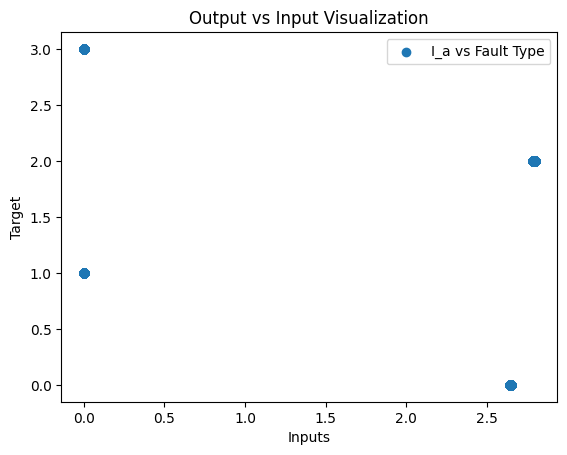

In [4]:
#Step 1: Understanding the Data

# Scatter plot of the inputs vs target
plt.scatter(X[:, 0], y, label='I_a vs Fault Type')
#plt.scatter(X[:, 1], y, label='I_b vs Fault Type')
#plt.scatter(X[:, 2], y, label='I_c vs Fault Type')

plt.xlabel('Inputs')
plt.ylabel('Target')
plt.legend()
plt.title('Output vs Input Visualization')
plt.show()

In [5]:
#Step2: Scaling the data

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)
#print("Train data are:")
#print(X_train)
#print(y_train)

#Normalizing the Input
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
#Step 3:  Training with various Model

def ML_classifier(classifier,train_inputs= X_train_scaled,train_target = y_train, test_inputs= X_test_scaled, test_output = y_test,model_name = ""):
    t = time.process_time()
    classifier.fit(train_inputs,train_target)
    #training_time = time.process_time() - t
    print(f"Training Time =",time.process_time() - t)
    print("Training Accuracy =" ,accuracy_score(train_target, classifier.predict(train_inputs)))
    print("Training Precision =", precision_score(train_target, classifier.predict(train_inputs), average='micro'))
    print("Training Recall =", recall_score(train_target, classifier.predict(train_inputs), average='micro'))
    print("Training F1 Score =", f1_score(train_target, classifier.predict(train_inputs), average='micro'))
    print("--------------------------------------------------------------------------")
    #t = time.process_time()
    classifier.fit(test_inputs, test_output) #for MLR
    #training_time = time.process_time() - t
    print("Testing Time =",time.process_time() - t)
    print("Testing Accuracy =" ,accuracy_score(test_output, classifier.predict(test_inputs)))
    print("Testing Precision =", precision_score(test_output, classifier.predict(test_inputs), average='micro'))
    print("Testing Recall =", recall_score(y_test, classifier.predict(test_inputs), average='micro'))
    print("Testing F1 Score =", f1_score(y_test, classifier.predict(test_inputs), average='micro'))

    y_pred=classifier.predict(test_inputs);
    y_pred=np.array(y_pred)

    plt.scatter(test_output, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Predicted vs Actual for {model_name} Model')
    plt.legend()
    plt.savefig(model_name + ".svg",)
    plt.show()

    print("--------------------------------------------------------------------------")
    print("--------------------------------------------------------------------------")


Training Time = 0.03534146299999996
Training Accuracy = 1.0
Training Precision = 1.0
Training Recall = 1.0
Training F1 Score = 1.0
--------------------------------------------------------------------------
Testing Time = 0.07838927000000062
Testing Accuracy = 1.0
Testing Precision = 1.0
Testing Recall = 1.0
Testing F1 Score = 1.0


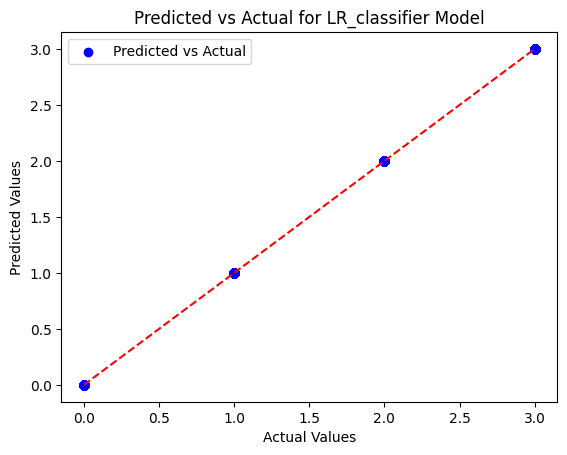

--------------------------------------------------------------------------
--------------------------------------------------------------------------
Training Time = 0.011942582999999729
Training Accuracy = 1.0
Training Precision = 1.0
Training Recall = 1.0
Training F1 Score = 1.0
--------------------------------------------------------------------------
Testing Time = 0.08475972799999987
Testing Accuracy = 1.0
Testing Precision = 1.0
Testing Recall = 1.0
Testing F1 Score = 1.0


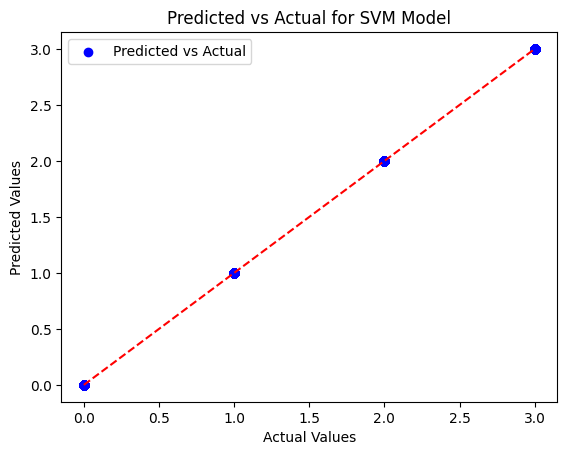

--------------------------------------------------------------------------
--------------------------------------------------------------------------
Training Time = 0.007205268999999959
Training Accuracy = 1.0
Training Precision = 1.0
Training Recall = 1.0
Training F1 Score = 1.0
--------------------------------------------------------------------------
Testing Time = 0.034991647000000015
Testing Accuracy = 1.0
Testing Precision = 1.0
Testing Recall = 1.0
Testing F1 Score = 1.0


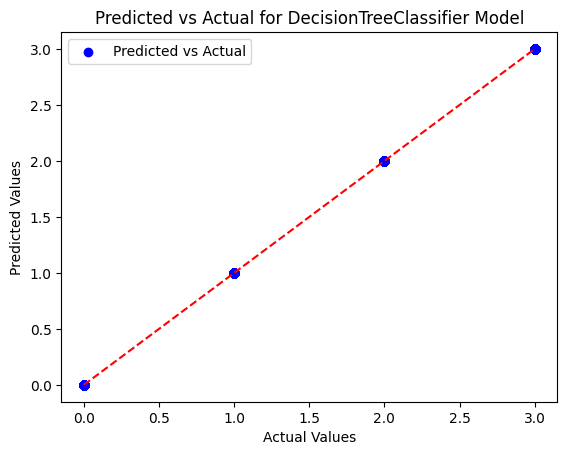

--------------------------------------------------------------------------
--------------------------------------------------------------------------
Training Time = 1.7101565900000004
Training Accuracy = 1.0
Training Precision = 1.0
Training Recall = 1.0
Training F1 Score = 1.0
--------------------------------------------------------------------------
Testing Time = 2.7787760230000007
Testing Accuracy = 1.0
Testing Precision = 1.0
Testing Recall = 1.0
Testing F1 Score = 1.0


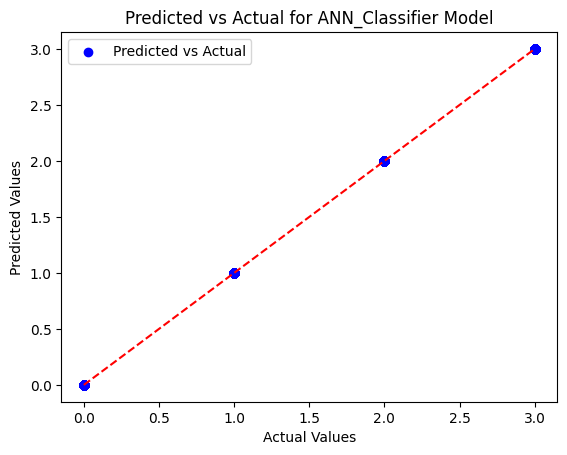

--------------------------------------------------------------------------
--------------------------------------------------------------------------
Training Time = 0.3896350159999997
Training Accuracy = 1.0
Training Precision = 1.0
Training Recall = 1.0
Training F1 Score = 1.0
--------------------------------------------------------------------------
Testing Time = 0.7913356819999997
Testing Accuracy = 1.0
Testing Precision = 1.0
Testing Recall = 1.0
Testing F1 Score = 1.0


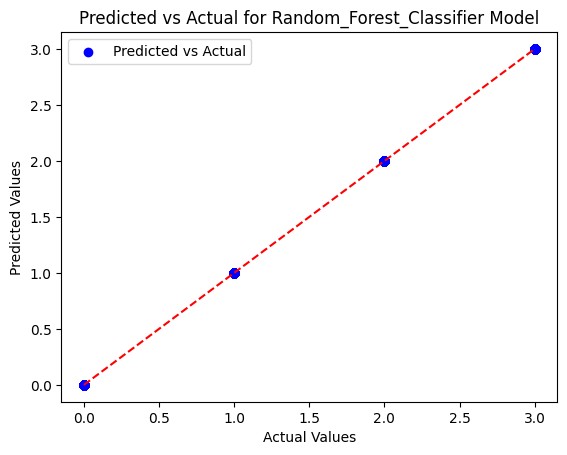

--------------------------------------------------------------------------
--------------------------------------------------------------------------
Training Time = 0.6694669340000026
Training Accuracy = 0.9990625
Training Precision = 0.9990625
Training Recall = 0.9990625
Training F1 Score = 0.9990625
--------------------------------------------------------------------------
Testing Time = 1.6471710750000028
Testing Accuracy = 0.99875
Testing Precision = 0.99875
Testing Recall = 0.99875
Testing F1 Score = 0.99875


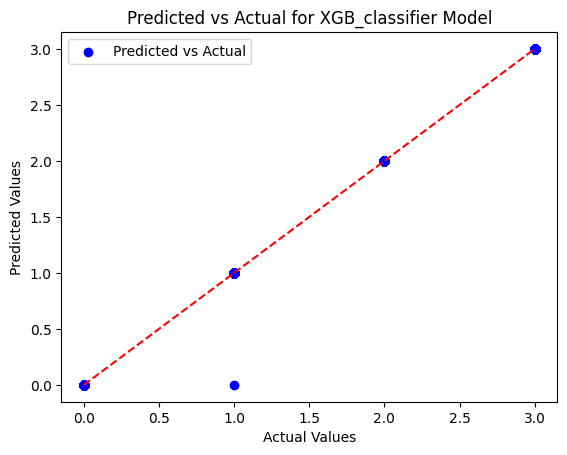

--------------------------------------------------------------------------
--------------------------------------------------------------------------


In [7]:

classifier = LogisticRegression();
ML_classifier(classifier,train_inputs= X_train_scaled,train_target = y_train, test_inputs= X_test_scaled, test_output = y_test,model_name = "LR_classifier")

classifier = svm.SVC();
ML_classifier(classifier,train_inputs= X_train_scaled,train_target = y_train, test_inputs= X_test_scaled, test_output = y_test,model_name = "SVM")

classifier = tree.DecisionTreeClassifier()
ML_classifier(classifier,train_inputs= X_train_scaled,train_target = y_train, test_inputs= X_test_scaled, test_output = y_test,model_name = "DecisionTreeClassifier")

classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
ML_classifier(classifier,train_inputs= X_train_scaled,train_target = y_train, test_inputs= X_test_scaled, test_output = y_test,model_name = "ANN_Classifier")


classifier = RandomForestClassifier()
ML_classifier(classifier,train_inputs= X_train_scaled,train_target = y_train, test_inputs= X_test_scaled, test_output = y_test,model_name = "Random_Forest_Classifier")

classifier = XGBClassifier(n_estimators=100, random_state=42)
ML_classifier(classifier,train_inputs= X_train_scaled,train_target = y_train, test_inputs= X_test_scaled, test_output = y_test,model_name = "XGB_classifier")



# Hyper Parameter Tuning for ANN

In [ ]:
#Hyperparameter Tuning for ANN

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],  # Different layer configurations
    'activation': ['relu', 'tanh', 'logistic'],  # Activation functions
    #'solver': ['adam', 'sgd'],  # Solvers
    #'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedules
    'learning_rate_init': [0.001, 0.01, 0.1]  # Initial learning rate values
}

# Instantiate the classifier
classifier = MLPClassifier(random_state=12345, max_iter=1000)


# Instantiate 5-fold CV repeated 3 times (reduce folds and repeats)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=54321)


# Instantiate grid search CV
grid_cv = GridSearchCV(classifier, param_grid, scoring='accuracy', n_jobs=5, cv=cv, refit=True)

# Perform grid search
grid_cv.fit(X_train_scaled, y_train)

# Which parameters were the best?
print(f"Best Parameters: {grid_cv.best_params_}")

# Get the best estimator (classifier with best hyperparameters)
best_classifier = grid_cv.best_estimator_

# Evaluate the best model on the test set
y_pred = best_classifier.predict(X_test_scaled)
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_pred)}")